## Task4:

In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(10)
random.seed(10)

m = 110
survey = {
    "Respondent_Age": np.random.randint(17, 35, m),
    "User_Gender": np.random.choice(["M", "F"], m),
    "Qualification": np.random.choice(["Intermediate", "Graduate", "Postgraduate"], m),
    "Study_Hours_Per_Day": np.random.randint(1, 9, m),
    "Primary_Device": np.random.choice(["Smartphone", "Laptop", "Tablet"], m),
    "Enjoys_Programming": np.random.choice(["Yes", "No"], m),
    "Preferred_Language": np.random.choice(["Python", "C", "C++", "Java", "None"], m),
    "Daily_SocialMedia": np.random.randint(0, 6, m),
    "Online_Buyer": np.random.choice(["Yes", "No"], m),
    "AI_Career_Interest": np.random.choice(["Yes", "No"], m)  # target
}

df = pd.DataFrame(survey)
print("Dataset dimensions:", df.shape)
df.head()


Dataset dimensions: (110, 10)


,Respondent_Age,User_Gender,Qualification,Study_Hours_Per_Day,Primary_Device,Enjoys_Programming,Preferred_Language,Daily_SocialMedia,Online_Buyer,AI_Career_Interest
0,26,F,Postgraduate,1,Tablet,No,Java,3,Yes,Yes
1,21,F,Graduate,2,Tablet,No,Java,4,Yes,No
2,32,M,Intermediate,4,Laptop,Yes,C++,3,No,Yes
3,17,M,Intermediate,6,Tablet,No,C,0,No,No
4,34,F,Intermediate,1,Smartphone,Yes,C,4,No,Yes


        Respondent_Age User_Gender Qualification  Study_Hours_Per_Day  \
count       110.000000         110           110           110.000000   
unique             NaN           2             3                  NaN   
top                NaN           M  Intermediate                  NaN   
freq               NaN          57            38                  NaN   
mean         26.709091         NaN           NaN             4.363636   
std           5.464389         NaN           NaN             2.372346   
min          17.000000         NaN           NaN             1.000000   
25%          22.000000         NaN           NaN             2.000000   
50%          28.000000         NaN           NaN             4.000000   
75%          31.750000         NaN           NaN             6.750000   
max          34.000000         NaN           NaN             8.000000   

       Primary_Device Enjoys_Programming Preferred_Language  \
count             110                110                110 

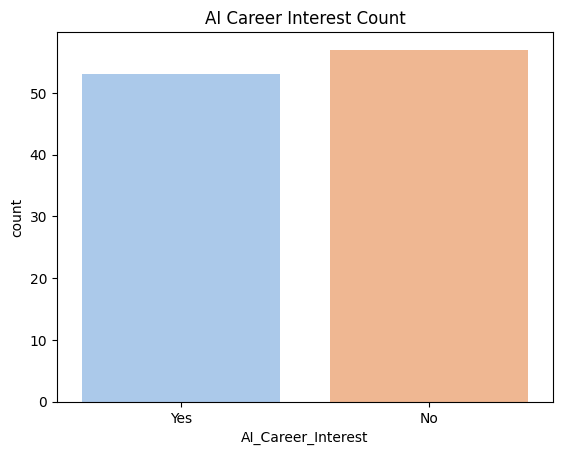

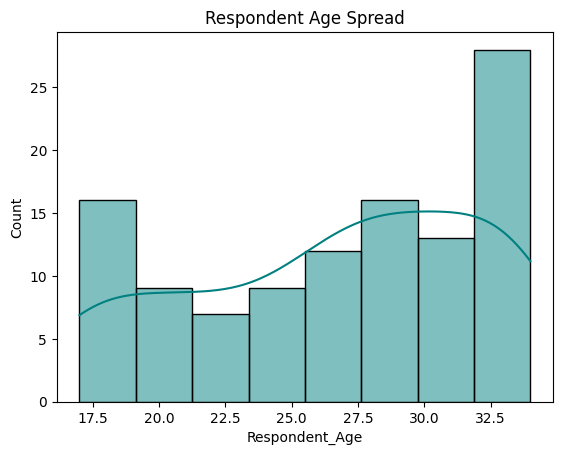

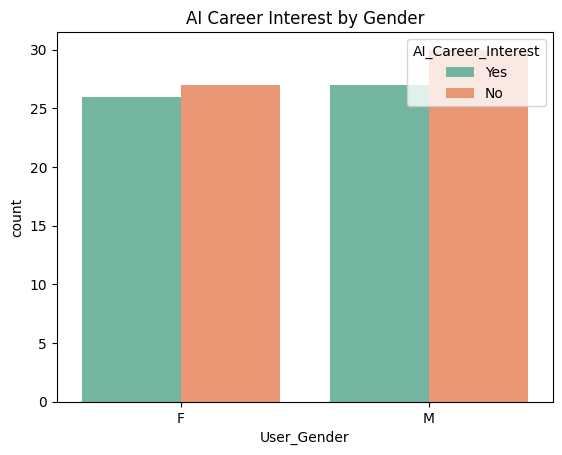

Target counts:
 AI_Career_Interest
No     57
Yes    53
Name: count, dtype: int64


In [12]:
print(df.describe(include="all"))

sns.countplot(x="AI_Career_Interest", hue="AI_Career_Interest", data=df, palette="pastel", legend=False)
plt.title("AI Career Interest Count")
plt.show()

sns.histplot(df["Respondent_Age"], bins=8, kde=True, color="teal")
plt.title("Respondent Age Spread")
plt.show()

sns.countplot(x="User_Gender", hue="AI_Career_Interest", data=df, palette="Set2")
plt.title("AI Career Interest by Gender")
plt.show()

print("Target counts:\n", df["AI_Career_Interest"].value_counts())

In [7]:
df.loc[random.sample(range(m), 4), "Preferred_Language"] = np.nan
print("Nulls before:\n", df.isnull().sum())

df["Preferred_Language"] = df["Preferred_Language"].fillna(df["Preferred_Language"].mode()[0])

print("Nulls after:\n", df.isnull().sum())

Nulls before:
 Respondent_Age         0
User_Gender            0
Qualification          0
Study_Hours_Per_Day    0
Primary_Device         0
Enjoys_Programming     0
Preferred_Language     4
Daily_SocialMedia      0
Online_Buyer           0
AI_Career_Interest     0
dtype: int64
Nulls after:
 Respondent_Age         0
User_Gender            0
Qualification          0
Study_Hours_Per_Day    0
Primary_Device         0
Enjoys_Programming     0
Preferred_Language     0
Daily_SocialMedia      0
Online_Buyer           0
AI_Career_Interest     0
dtype: int64


In [8]:
from sklearn.utils import resample

class_dist = df["AI_Career_Interest"].value_counts()
print("Before balancing:\n", class_dist)

major = df[df["AI_Career_Interest"] == class_dist.idxmax()]
minor = df[df["AI_Career_Interest"] == class_dist.idxmin()]

minor_resampled = resample(minor,
                           replace=True,
                           n_samples=len(major),
                           random_state=10)

df_bal = pd.concat([major, minor_resampled])
print("After balancing:\n", df_bal["AI_Career_Interest"].value_counts())


Before balancing:
 AI_Career_Interest
No     57
Yes    53
Name: count, dtype: int64
After balancing:
 AI_Career_Interest
No     57
Yes    57
Name: count, dtype: int64


In [9]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

encoded = df_bal.copy()

for c in encoded.select_dtypes(include="object").columns:
    encoded[c] = LabelEncoder().fit_transform(encoded[c])

X = encoded.drop("AI_Career_Interest", axis=1)
y = encoded["AI_Career_Interest"]

chi_vals, p_vals = chi2(X, y)
chi_table = pd.DataFrame({"Feature": X.columns,
                          "Chi2_Value": chi_vals,
                          "p_val": p_vals})
print(chi_table.sort_values(by="Chi2_Value", ascending=False))


               Feature  Chi2_Value     p_val
3  Study_Hours_Per_Day    3.265306  0.070760
5   Enjoys_Programming    1.724138  0.189161
7    Daily_SocialMedia    1.680556  0.194851
4       Primary_Device    1.495575  0.221353
2        Qualification    1.070796  0.300766
0       Respondent_Age    0.255875  0.612969
6   Preferred_Language    0.236715  0.626589
8         Online_Buyer    0.157895  0.691102
1          User_Gender    0.064516  0.799495


In [10]:
df_dummy = pd.get_dummies(df_bal, drop_first=True)
print("Shape after dummy encoding:", df_dummy.shape)


Shape after dummy encoding: (114, 15)


### Dummy Encoding drops one category per feature to prevent redundancy,
### while One-Hot Encoding keeps all categories → can cause multicollinearity.

In [11]:
df_dupes = pd.concat([df_bal, df_bal.iloc[:3]])

print("Duplicate rows before:", df_dupes.duplicated().sum())

df_clean1 = df_dupes.drop_duplicates()
print("After drop_duplicates:", df_clean1.duplicated().sum())

df_clean2 = df_dupes[~df_dupes.duplicated(keep="first")]
print("After keep=first:", df_clean2.duplicated().sum())

Duplicate rows before: 29
After drop_duplicates: 0
After keep=first: 0
